# Creating a Map from the Data

## Table of Contents
* [01. Importing Libraries and Data](#01.-Importing-Libraries-and-Data)
* [02. Viewing and Reformatting Data](#02.-Viewing-and-Reformatting-Data)
* [03. Checking for and Cleaning Extreme Values](#03.-Checking-for-and-Cleaning-Extreme-Values)
* [04. Creating a Subset of the Data to Map](#04.-Creating-a-Subset-of-the-Data-to-Map)
* [05. Creating a Map of the Data](#05.-Creating-a-Map-of-the-Data)
* [06. Exporting Data Frame](#06.-Exporting-Data-Frame)

# 01. Importing Libraries and Data 

In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json 

In [2]:
# Assigning variable to a path 
country_geo = r'/Users/suzandiab/Documents/Cost of Living/02 Data/Original Data/us-states.json'

In [3]:
# Viewing path 
country_geo

'/Users/suzandiab/Documents/Cost of Living/02 Data/Original Data/us-states.json'

In [4]:
# Importing cost of living file
df_geo = pd.read_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_graphs.pkl')

# 02. Viewing and Reformatting Data

In [5]:
# Checking values in state column 
df_geo['state'].value_counts(dropna=False).sort_index()

state
AK     290
AL     670
AR     750
AZ     150
CA     580
CO     640
CT      80
DC      10
DE      30
FL     670
GA    1590
HI      50
IA     990
ID     440
IL    1020
IN     920
KS    1050
KY    1200
LA     640
MA     140
MD     240
ME     160
MI     830
MN     870
MO    1160
MS     820
MT     560
NC    1000
ND     530
NE     930
NH     100
NJ     210
NM     330
NV     170
NY     620
OH     880
OK     770
OR     360
PA     670
RI      50
SC     460
SD     660
TN     950
TX    2540
UT     290
VA    1330
VT     140
WA     390
WI     720
WV     550
WY     230
Name: count, dtype: int64

In [6]:
# Creating dictionary to map state abbreviations to their full names
state_abbr_to_full = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [7]:
# Replace all state abbreviations with their full names
df_geo['state'] = df_geo['state'].replace(state_abbr_to_full)

In [8]:
# Checking new values in state column 
df_geo['state'].value_counts(dropna=False).sort_index()

state
Alabama                  670
Alaska                   290
Arizona                  150
Arkansas                 750
California               580
Colorado                 640
Connecticut               80
Delaware                  30
District of Columbia      10
Florida                  670
Georgia                 1590
Hawaii                    50
Idaho                    440
Illinois                1020
Indiana                  920
Iowa                     990
Kansas                  1050
Kentucky                1200
Louisiana                640
Maine                    160
Maryland                 240
Massachusetts            140
Michigan                 830
Minnesota                870
Mississippi              820
Missouri                1160
Montana                  560
Nebraska                 930
Nevada                   170
New Hampshire            100
New Jersey               210
New Mexico               330
New York                 620
North Carolina          1000
North Da

In [9]:
df_geo.head()

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,Income Level
0,1,Alabama,True,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,single parent,0.0,Average Income
1,1,Alabama,True,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,single parent,1.0,Average Income
2,1,Alabama,True,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,single parent,2.0,Average Income
3,1,Alabama,True,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,single parent,3.0,Average Income
4,1,Alabama,True,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,single parent,4.0,Average Income


In [10]:
df_geo.isnull().sum()

case_id                           0
state                             0
metropolitan_area                 0
county                            0
family_member_count               0
annual_housing_cost               0
annual_food_cost                  0
annual_transportation_cost        0
annual_healthcare_cost            0
annual_other_necessities_cost     0
annual_childcare_cost             0
annual_taxes                      0
annual_total_cost                 0
median_family_income             10
parent_status                     0
number_of_dependents              0
Income Level                      0
dtype: int64

In [11]:
# Creating subset for missing values
df_nan = df_geo[df_geo['median_family_income'].isnull() == True]

In [12]:
# Viewing missing values subset
df_nan

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,Income Level
15110,1533,Missouri,True,Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN,single parent,0.0,nan
15111,1533,Missouri,True,Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN,single parent,1.0,nan
15112,1533,Missouri,True,Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN,single parent,2.0,nan
15113,1533,Missouri,True,Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN,single parent,3.0,nan
15114,1533,Missouri,True,Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN,single parent,4.0,nan
15115,1533,Missouri,True,Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN,both parents,0.0,nan
15116,1533,Missouri,True,Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN,both parents,1.0,nan
15117,1533,Missouri,True,Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN,both parents,2.0,nan
15118,1533,Missouri,True,Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN,both parents,3.0,nan
15119,1533,Missouri,True,Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN,both parents,4.0,nan


In [13]:
# Creating new subset data frame with only non-missing values
df_no_null = df_geo[df_geo['median_family_income'].isnull() == False]

In [14]:
# Check again for missing values
df_no_null.isnull().sum()

case_id                          0
state                            0
metropolitan_area                0
county                           0
family_member_count              0
annual_housing_cost              0
annual_food_cost                 0
annual_transportation_cost       0
annual_healthcare_cost           0
annual_other_necessities_cost    0
annual_childcare_cost            0
annual_taxes                     0
annual_total_cost                0
median_family_income             0
parent_status                    0
number_of_dependents             0
Income Level                     0
dtype: int64

all missing values are removed from data set. 

# 03. Checking for and Cleaning Extreme Values

/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_total_cost', ylabel='Count'>

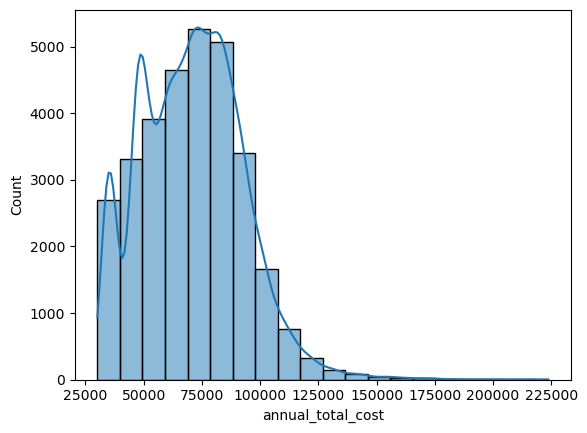

In [15]:
# Shows extreme values for annual total cost 
sns.histplot(df_no_null['annual_total_cost'], bins=20, kde = True)

In [16]:
# Check how many extreme values

df_no_null[df_no_null['annual_total_cost'] > 160000]

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,Income Level
1869,187,California,True,Alameda County,2p4c,38188.8276,17784.35760,16322.43360,22402.22760,20281.2924,19341.5700,27019.4208,161340.132,122820.71880,both parents,4.0,High Income
1929,193,California,True,Contra Costa County,2p4c,38656.3596,16888.41960,17701.56240,21923.73000,20126.0640,19471.0944,27224.0952,161991.324,117607.52340,both parents,4.0,High Income
2063,207,California,True,Marin County,1p3c,55151.5248,13777.72560,15281.50320,14031.36720,24975.7884,23739.2388,40014.7356,186971.880,157777.98440,single parent,3.0,High Income
2064,207,California,True,Marin County,1p4c,55151.5248,16864.86720,17743.32120,16837.69800,26094.3804,23739.2388,42819.6564,199250.700,157777.98440,single parent,4.0,High Income
2067,207,California,True,Marin County,2p2c,42906.3660,13821.76920,16695.10080,16837.41840,20554.8408,21446.9280,30906.3600,163168.776,157777.98440,both parents,2.0,High Income
2068,207,California,True,Marin County,2p3c,55151.5248,16875.32760,19327.78800,19643.74800,26098.1688,23739.2388,41341.5000,202177.284,157777.98440,both parents,3.0,High Income
2069,207,California,True,Marin County,2p4c,55151.5248,20651.35680,19816.48200,22450.07760,27466.3740,23739.2388,42864.5484,212139.612,157777.98440,both parents,4.0,High Income
2233,224,California,True,San Francisco County,1p3c,50513.3616,14315.68320,10072.45680,14927.98680,23490.1200,22479.6624,34450.7808,170250.048,135125.17190,single parent,3.0,High Income
2234,224,California,True,San Francisco County,1p4c,50513.3616,17523.36480,11417.91360,17913.19080,24652.3884,22479.6624,36303.6708,180803.556,135125.17190,single parent,4.0,High Income
2238,224,California,True,San Francisco County,2p3c,50513.3616,17534.23440,12111.15000,20900.36760,24656.3256,22479.6624,35544.7644,183739.860,135125.17190,both parents,3.0,High Income


In [17]:
# Checking dimensions before cleaning 
df_no_null.shape

(31420, 17)

In [18]:
# Rename column for formatting consistency
df_no_null.rename(columns={'Income Level': 'income_level'}, inplace=True)

/var/folders/4p/ym48tzyj1vv3lyzdlk4g93jh0000gn/T/ipykernel_29855/1136563663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_null.rename(columns={'Income Level': 'income_level'}, inplace=True)


In [19]:
# Cleaning extreme values
df_no_null = df_no_null[df_no_null['annual_total_cost'] < 160000]

/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_housing_cost', ylabel='Count'>

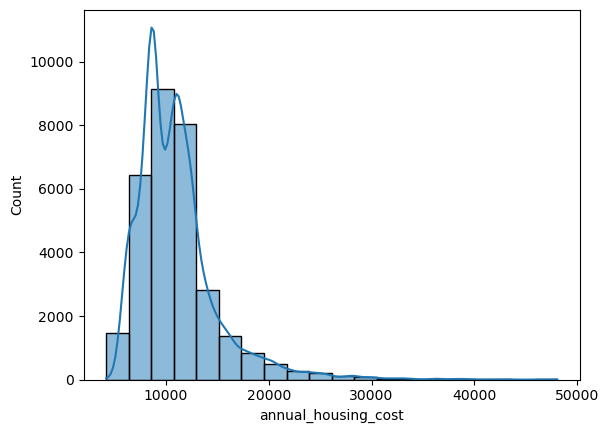

In [20]:
# Shows extreme values for annual housing cost 
sns.histplot(df_no_null['annual_housing_cost'], bins=20, kde = True)

In [21]:
# Check how many extreme values

df_no_null[df_no_null['annual_housing_cost'] >31000]

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
1863,187,California,True,Alameda County,1p3c,38188.8276,11864.98164,13812.97440,14001.4800,18136.4688,19341.5700,26596.6320,141942.936,122820.7188,single parent,3.0,High Income
1864,187,California,True,Alameda County,1p4c,38188.8276,14523.54000,14510.19240,16801.8468,19099.7700,19341.5700,27321.1728,149786.916,122820.7188,single parent,4.0,High Income
1868,187,California,True,Alameda County,2p3c,38188.8276,14532.54960,15877.17240,19601.8608,19103.0352,19341.5700,26115.7356,152760.756,122820.7188,both parents,3.0,High Income
1923,193,California,True,Contra Costa County,1p3c,38656.3596,11267.25072,15045.69720,13702.6068,18089.2920,19471.0944,26944.1628,143176.464,117607.5234,single parent,3.0,High Income
1924,193,California,True,Contra Costa County,1p4c,38656.3596,13791.87600,15792.64200,16443.3504,19004.0652,19471.0944,27590.1564,150749.544,117607.5234,single parent,4.0,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28279,2856,Virginia,True,Arlington County,2p4c,31821.5976,19621.02960,11149.84932,20770.7772,18639.6924,25178.0304,25132.1484,152313.132,165123.8906,both parents,4.0,High Income
29703,2999,Washington,True,King County,1p3c,33110.4204,11536.22832,13540.97040,10355.2266,16177.2408,24804.4188,18805.7340,128330.244,121465.3047,single parent,3.0,High Income
29704,2999,Washington,True,King County,1p4c,33110.4204,14121.12480,14201.03520,12428.1756,17113.8504,24804.4188,18584.7732,134363.796,121465.3047,single parent,4.0,High Income
29708,2999,Washington,True,King County,2p3c,33110.4204,14129.88120,15590.58240,14491.6068,17117.0244,24804.4188,17149.9524,136393.884,121465.3047,both parents,3.0,High Income


In [22]:
# Checking dimensions
df_no_null.shape

(31368, 17)

97 out of 31368 rows extreme

In [23]:
# Cleaning extreme values
df_no_null = df_no_null[df_no_null['annual_housing_cost'] < 31000]

In [24]:
# Checking dimensions
df_no_null.shape

(31271, 17)

/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_food_cost', ylabel='Count'>

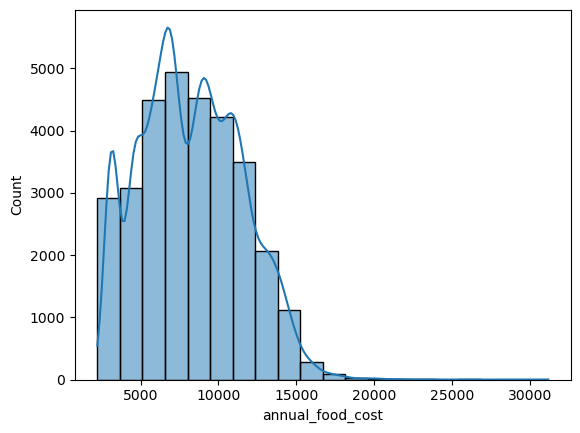

In [25]:
# Shows extreme values for annual food cost 
sns.histplot(df_no_null['annual_food_cost'], bins=20, kde = True)

In [26]:
# Check how many extreme values

df_no_null[df_no_null['annual_food_cost'] >18000]

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
684,69,Alaska,False,Aleutians West Census Area,1p4c,23808.0000,19280.3016,3175.38504,19130.82480,15612.59160,25498.0776,15600.39120,122105.5680,98061.89063,single parent,4.0,High Income
688,69,Alaska,False,Aleutians West Census Area,2p3c,23808.0000,19298.8932,4032.33984,22309.71720,15619.32840,25498.0776,14244.59280,124810.9440,98061.89063,both parents,3.0,High Income
689,69,Alaska,False,Aleutians West Census Area,2p4c,23808.0000,23698.7700,3692.81256,25500.10200,17213.57640,25498.0776,15038.92920,134450.2680,98061.89063,both parents,4.0,High Income
1889,189,California,False,Amador County,2p4c,19728.0000,18814.6812,18953.74080,22294.16880,13965.53280,13684.1556,14504.31240,121944.6000,79965.10156,both parents,4.0,Average Income
1909,191,California,False,Calaveras County,2p4c,18216.0000,19889.8080,18398.39400,25404.40440,13807.23600,13294.8384,15270.81240,124281.4920,83174.96094,both parents,4.0,Average Income
1949,195,California,True,El Dorado County,2p4c,25085.8560,20024.1984,18052.33320,21923.73000,16345.15320,15567.8016,19124.50800,136123.5840,105534.10160,both parents,4.0,High Income
2149,215,California,False,Nevada County,2p4c,22932.0000,21502.4952,18272.43480,25404.40440,16100.37000,14297.5536,19845.24120,138354.5040,87976.39844,both parents,4.0,High Income
2209,221,California,True,San Benito County,2p4c,28752.0000,19710.6228,18000.12360,31637.23200,17559.91800,16563.0624,26295.45360,158518.4160,97108.99219,both parents,4.0,High Income
2409,241,California,False,Tuolumne County,2p4c,18612.0000,18187.5276,16937.41800,25404.40440,13333.92000,13449.8652,13761.75000,119686.8864,77912.47656,both parents,4.0,Average Income
2989,299,Colorado,False,Routt County,2p4c,21552.0000,18993.8712,16188.49680,16121.54880,14691.36960,17117.4948,14866.00080,119530.7808,97519.72656,both parents,4.0,High Income


In [27]:
# Cleaning extremes
df_no_null = df_no_null[df_no_null['annual_food_cost'] < 18000]

/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_other_necessities_cost', ylabel='Count'>

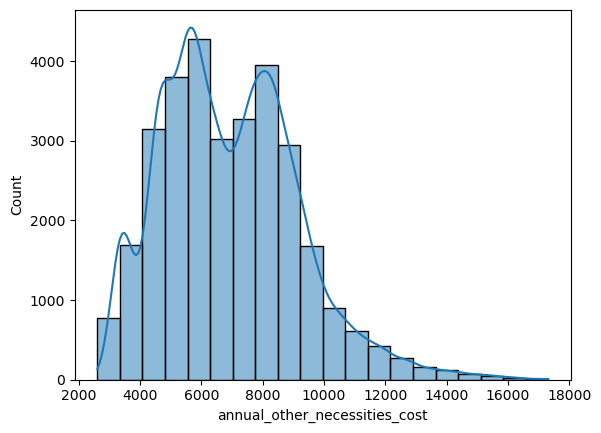

In [28]:
# Shows extreme values for annual other necessities cost 
sns.histplot(df_no_null['annual_other_necessities_cost'], bins=20, kde = True)

In [29]:
# Check how many extreme values

df_no_null[df_no_null['annual_other_necessities_cost'] >16000]

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
2129,213,California,True,Monterey County,2p4c,30792.0000,15410.1228,17201.43720,31637.23200,16740.8508,16843.3956,24619.8048,153244.836,79007.07813,both parents,4.0,Average Income
2164,217,California,True,Placer County,1p4c,30700.3128,13901.6256,15117.99480,16443.35040,16161.0408,17091.0336,22079.6412,131494.992,111357.23440,single parent,4.0,High Income
2168,217,California,True,Placer County,2p3c,30700.3128,13910.2488,16456.82760,19182.98760,16164.1656,17091.0336,20248.0776,133753.656,111357.23440,both parents,3.0,High Income
2169,217,California,True,Placer County,2p4c,30700.3128,17022.8100,17401.06800,21923.73000,17291.9688,17091.0336,21233.1876,142664.112,111357.23440,both parents,4.0,High Income
2204,221,California,True,San Benito County,1p4c,28752.0000,16096.6188,16245.65280,23720.85240,16250.4228,16563.0624,25421.0004,143049.612,97108.99219,single parent,4.0,High Income
2208,221,California,True,San Benito County,2p3c,28752.0000,16106.6016,17841.13680,27686.11560,16254.0408,16563.0624,24549.0156,147751.968,97108.99219,both parents,3.0,High Income
2259,226,California,True,San Luis Obispo County,2p4c,28596.0000,16798.8240,17448.18720,22928.57520,16448.3352,16515.8916,19953.1716,138688.980,95203.20313,both parents,4.0,High Income
2509,251,Colorado,True,Boulder County,2p4c,28320.0000,17694.7632,16525.92000,15894.65880,16672.9632,24466.0332,20797.5072,140371.848,115841.38280,both parents,4.0,High Income
5503,557,Hawaii,True,Maui County,1p3c,29540.1588,15002.3772,14218.27440,11550.71928,16139.5164,20553.9840,25572.3756,132577.404,92012.85156,single parent,3.0,High Income
12059,1216,Maryland,True,Howard County,2p4c,28150.2948,16754.0268,15947.72040,14454.60840,16270.6068,21324.8508,17962.8588,130864.968,148691.59380,both parents,4.0,High Income


In [30]:
# Cleaning extremes
df_no_null = df_no_null[df_no_null['annual_other_necessities_cost'] < 16000]

In [31]:
# Checking new dimensions
df_no_null.shape

(31189, 17)

/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_family_income', ylabel='Count'>

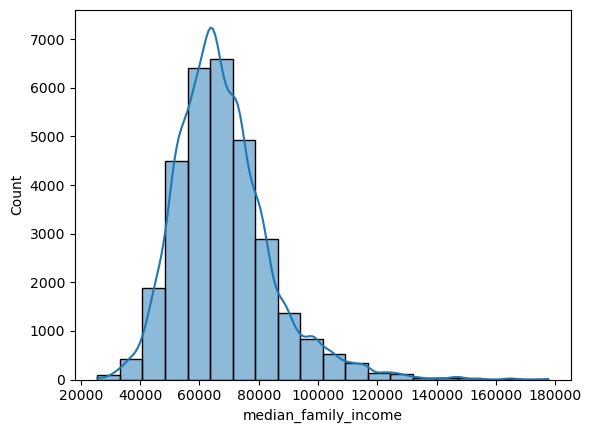

In [32]:
# Shows extreme values for median family income cost 
sns.histplot(df_no_null['median_family_income'], bins=20, kde = True)

In [33]:
# Check how many extreme values

df_no_null[df_no_null['median_family_income'] >135000]

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
2060,207,California,True,Marin County,1p0c,28378.8228,4782.93312,11735.37600,5612.37996,12015.81120,0.0000,16706.19840,79231.5240,157777.9844,single parent,0.0,High Income
2230,224,California,True,San Francisco County,1p0c,25992.2052,4969.68492,7839.84888,5972.37996,11218.71384,0.0000,14023.23720,70016.0688,135125.1719,single parent,0.0,High Income
2280,229,California,True,Santa Clara County,1p0c,26736.0000,3984.04800,10735.28544,4496.37996,11131.08468,0.0000,14489.84280,71572.6404,144424.1094,single parent,0.0,High Income
2285,229,California,True,Santa Clara County,2p0c,30696.0000,7304.08884,13601.26800,8992.76004,13768.93080,0.0000,13717.24920,88080.2988,144424.1094,both parents,0.0,High Income
2620,263,Colorado,True,Douglas County,1p0c,17708.6676,3703.91928,11098.18728,3956.37996,7758.62472,0.0000,9249.91044,53475.6912,138550.6719,single parent,0.0,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29262,2955,Virginia,True,Falls Church city,1p2c,23521.2408,8781.98076,10391.42136,10385.38848,11704.73076,21685.7676,17997.66360,104468.1912,177662.4688,single parent,2.0,High Income
29263,2955,Virginia,True,Falls Church city,1p3c,30157.8312,11715.54864,11319.69804,13009.34160,15172.37640,24379.6512,23981.96880,129736.4160,177662.4688,single parent,3.0,High Income
29265,2955,Virginia,True,Falls Church city,2p0c,20629.3944,7456.25760,10087.57692,10274.95968,10176.53904,0.0000,11236.67208,69861.3984,177662.4688,both parents,0.0,High Income
29266,2955,Virginia,True,Falls Church city,2p1c,23521.2408,9280.06272,11639.13132,12898.91400,11885.20536,12930.6432,14826.77400,96981.9732,177662.4688,both parents,1.0,High Income


In [34]:
# Cleaning extremes
df_no_null = df_no_null[df_no_null['median_family_income'] < 135000]

/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='annual_childcare_cost', ylabel='Count'>

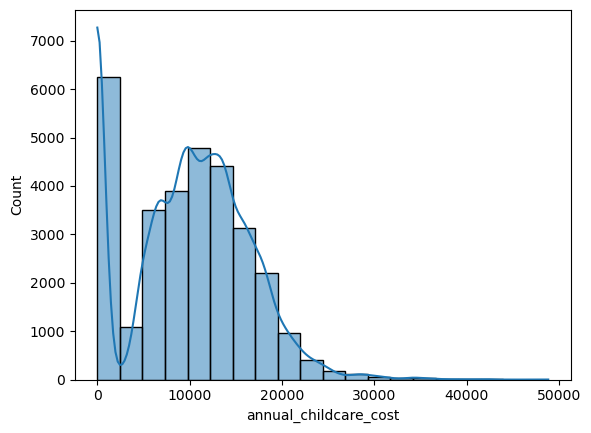

In [35]:
# Shows extreme values for annual childcare cost 
sns.histplot(df_no_null['annual_childcare_cost'], bins=20, kde = True)

In [36]:
# Check how many extreme values

df_no_null[df_no_null['annual_childcare_cost'] >32000]

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
3192,326,District of Columbia,True,District of Columbia,1p2c,19414.1592,9700.50288,7528.00200,11599.16088,10549.38936,42045.9636,24911.7420,125748.9120,116607.39060,single parent,2.0,High Income
3193,326,District of Columbia,True,District of Columbia,1p3c,24891.9204,12940.89960,8171.78544,14932.00200,13708.32240,48831.0852,31384.2984,154860.3120,116607.39060,single parent,3.0,High Income
3197,326,District of Columbia,True,District of Columbia,2p2c,19414.1592,12982.26600,8963.19360,16532.64120,11738.50272,42045.9636,22870.6332,134547.3600,116607.39060,both parents,2.0,High Income
18312,1858,New York,True,Bronx County,1p2c,20096.0628,7527.41088,6156.68484,11066.41992,10009.07376,32258.5512,18048.1404,105162.3396,48566.81641,single parent,2.0,Low Income
18313,1858,New York,True,Bronx County,1p3c,25430.8680,10041.89940,6508.15212,11515.95996,12853.18200,38123.7420,23936.9064,128410.7160,48566.81641,single parent,3.0,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20209,2047,North Dakota,True,Morton County,2p4c,15048.8940,14334.99720,17650.45200,15802.54560,10646.94288,34069.3032,12274.6800,119827.8168,95589.28906,both parents,4.0,High Income
20233,2050,North Dakota,True,Oliver County,1p3c,14892.0000,9743.03316,15280.68720,9967.23492,8926.24440,33974.1000,14345.6796,107128.9800,89633.69531,single parent,3.0,High Income
20234,2050,North Dakota,True,Oliver County,1p4c,14892.0000,11926.13160,16173.55200,12033.19560,9717.26664,33974.1000,14412.6396,113128.8864,89633.69531,single parent,4.0,High Income
20238,2050,North Dakota,True,Oliver County,2p3c,14892.0000,11933.52828,17203.79880,13736.58360,9719.94648,33974.1000,12512.9928,113972.9532,89633.69531,both parents,3.0,High Income


In [37]:
# Cleaning extremes
df_no_null = df_no_null[df_no_null['annual_childcare_cost'] < 32000]

In [38]:
# Checking dimensions
df_no_null.shape

(31016, 17)

# 04. Creating a Subset of the Data to Map

In [39]:
# Creating subset of just the necessary columns to plot 
data_to_plot = df_no_null.groupby(['state'])['annual_total_cost'].mean().reset_index()

In [40]:
# Viewig df
data_to_plot.head()

,state,annual_total_cost
0,Alabama,68967.570020
1,Alaska,84796.706810
2,Arizona,75985.939376
3,Arkansas,61491.891851
4,California,82570.762154


In [41]:
# Renaming annual total cost column
data_to_plot.rename(columns={'annual_total_cost': 'mean_annual_total_cost'}, inplace=True)

In [42]:
# Viewing column with changed name
data_to_plot.head()

,state,mean_annual_total_cost
0,Alabama,68967.570020
1,Alaska,84796.706810
2,Arizona,75985.939376
3,Arkansas,61491.891851
4,California,82570.762154


# 05. Creating a Map of the Data

In [43]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'mean_annual_total_cost'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "annual total cost").add_to(map)
folium.LayerControl().add_to(map)

map

Yes, this choropleth map does answer the question of which states are more the expensive and the least expensive to live in, in regard to total annual cost.

New Research Question: 
What are the primary factors contributing to variations in annual total costs among different states?

Top States (Annual Mean Total Cost) :
1) Oregon
2) Wyoming 
3) California
4) Nebraska 
5) New York
6) New Jersey 
7) Connecticut
8) Massachusettes 
9) Vermont 
10) Rhode Island 
11) Maryland
12) Delaware 
13) Alaska 
14) Hawaii 

In [44]:
# Saving map
map.save('plot_data.html')

# 06. Exporting Data Frame

In [45]:
# Exporting data frame as pickle to preserve format and data types 
df_no_null.to_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_map.pkl')

In [46]:
# Exporting data frame as pickle to preserve format and data types 
df_no_null.to_csv(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_cleanest.csv')